# 1) Data Preparation

# 1.1)  Preprocess Data
## In Bengali, we are strictly specifying to remove anything that comes in the window [a-zA-Z0-9()🇧//:<>""-`=\|’🇩“~”_] because of the change in literature. Only Bengali characters along with [. , ! ] special characters remain in the text

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import re

## Using Sentence Tokenize to split into sentences.
with open('../data/bengali_corpus.txt', 'r') as f:
    f = f.read()
    f = re.sub('[a-zA-Z0-9()🇧//:<>""-`=\|’🇩“~”_]+', '', f)
    sent = sent_tokenize(f)



In [19]:
## Checking the word level tokens
with open('../data/bengali_corpus.txt', 'r') as f:
    f = f.read()
    f = re.sub('[a-zA-Z0-9()🇧//:<>""-`=\|’🇩“~”_]+', '', f)
    words = word_tokenize(f)
    print(len(words), len(set(words)))
    print(words[100:110])

254224 51338
['বের', 'করে', 'না', 'কেনে', 'ওর', 'কারনে', 'ভাল', 'পিলিআর', 'গুলো', 'খেলা']


## 1.2) Train and Test Splits

In [20]:
## Using train_test_split to split the data into train and test sets (sentence wise).

from sklearn.model_selection import train_test_split
eng_train, eng_test = train_test_split(sent, train_size=0.8, random_state=0)
print(len(eng_test), len(eng_train))

with open("beng_train.txt", "w") as f:
    for sentence in eng_train:
        f.write(sentence + "\n")

with open("beng_test.txt", "w") as f:
    for sentence in eng_test:
        f.write(sentence + "\n")


151 600


# 2) Subword Segmentation 
## Here, for the purpose of sub word segmentation, we have trained 3 models for each language which have their corresponding output files listed with the respective sub-words generated. 
## Character Level Model (S1): Used Vocab size as 93 with character coverage of 0.995 to split the data into characters. We could observe that bengali character vocab is much larger than english.
## Subword Small Unit Model (S2): Vocab Size of 700 worked best. Used the same character coverage of 0.995 for all the models of bengali.
## Subword Large Uni Model (S3): Vocab size of 2500 gave us better results. We used larger vocab sizes in bengali compared to english due to its rich morphological language properties.

## Compared to english, we could not make much sense of the sub words generated from the models as we do not understand the language. 

In [21]:
#Sentence Piece S1 Model
!spm_train --input=beng_train.txt --model_prefix=beng_s1/beng_model_s1 --vocab_size=93 --character_coverage=0.995 --model_type=bpe
!spm_encode --model=beng_s1/beng_model_s1.model --output_format=piece --input=beng_train.txt --output=beng_s1/beng_s1.txt
!spm_encode --model=beng_s1/beng_model_s1.model --output_format=piece --input=beng_test.txt --output=beng_s1/beng_test_s1.txt

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: beng_train.txt
  input_format: 
  model_prefix: beng_s1/beng_model_s1
  model_type: BPE
  vocab_size: 93
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  

In [22]:
#Sentence Piece S2 Model
!spm_train --input=beng_train.txt --model_prefix=beng_s2/beng_model_s2 --vocab_size=700 --character_coverage=0.995 --model_type=bpe
!spm_encode --model=beng_s2/beng_model_s2.model --output_format=piece --input=beng_train.txt --output=beng_s2/beng_s2.txt
!spm_encode --model=beng_s2/beng_model_s2.model --output_format=piece --input=beng_test.txt --output=beng_s2/beng_test_s2.txt

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: beng_train.txt
  input_format: 
  model_prefix: beng_s2/beng_model_s2
  model_type: BPE
  vocab_size: 700
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
 

In [23]:
#Sentence Piece S3 Model
!spm_train --input=beng_train.txt --model_prefix=beng_s3/beng_model_s3 --vocab_size=2500 --character_coverage=0.995 --model_type=bpe
!spm_encode --model=beng_s3/beng_model_s3.model --output_format=piece --input=beng_train.txt --output=beng_s3/beng_s3.txt
!spm_encode --model=beng_s3/beng_model_s3.model --output_format=piece --input=beng_test.txt --output=beng_s3/beng_test_s3.txt

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: beng_train.txt
  input_format: 
  model_prefix: beng_s3/beng_model_s3
  model_type: BPE
  vocab_size: 2500
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1


# 3) LM Training
# Baseline RNNLM Model S1
## Using Default Parameters: Hidden:&ensp; 40  &emsp; BPTT:&ensp; 3 &emsp;  Class:&ensp;  268
## Results:
## TRAIN entropy: 4.00    
## VALID entropy: 4.02
## PPL net: 16.30

In [24]:
## Baseline RNNLM Model S1
!/home/snlp-project-21/rnnlm/rnnlm -train beng_s1/beng_s1.txt -valid beng_s1/beng_test_s1.txt  -rnnlm beng_s1/rnnlm_baseline_s1 -hidden 40 -rand-seed 1 -debug 2 -bptt 3 -class 267
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s1/rnnlm_baseline_s1 -test beng_s1/beng_test_s1.txt

debug mode: 2
train file: beng_s1/beng_s1.txt
valid file: beng_s1/beng_test_s1.txt
class size: 267
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: beng_s1/rnnlm_baseline_s1
Starting training using file beng_s1/beng_s1.txt
Vocab size: 268
Words in train file: 832540
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 4.4308    Words/sec: 64729.2   VALID entropy: 4.3847
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 4.1977    Words/sec: 64818.3   VALID entropy: 4.3242
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 4.1565    Words/sec: 64873.8   VALID entropy: 4.3058
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 4.1374    Words/sec: 64699.8   VALID entropy: 4.2942
Iter:   4	Alpha: 0.050000	   TRAIN entropy: 4.0637    Words/sec: 64676.7   VALID entropy: 4.1658
Iter:   5	Alpha: 0.025000	   TRAIN entropy: 4.0266    Words/sec: 64704.9   VALID entropy: 4.0940
Iter:   6	Alpha: 0.012500	   TRAIN entropy: 4.0088    Words/sec: 64779.4   VALID entropy: 4.0568
Iter:   7	Alpha: 0.006250	   TRAIN entropy: 4.00

# Baseline RNNLM Model S2
## Using Default Parameters: Hidden:&ensp; 40  &emsp; BPTT:&ensp; 3 &emsp;  Class:&ensp;  875
## Results:
## TRAIN entropy: 6.34    
## VALID entropy: 6.52
## PPL net: 91.85

In [25]:
## Baseline RNNLM Model S2
!/home/snlp-project-21/rnnlm/rnnlm -train beng_s2/beng_s2.txt -valid beng_s2/beng_test_s2.txt  -rnnlm beng_s2/rnnlm_baseline_s2 -hidden 40 -rand-seed 1 -debug 2 -bptt 3 -class 874
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s2/rnnlm_baseline_s2 -test beng_s2/beng_test_s2.txt


debug mode: 2
train file: beng_s2/beng_s2.txt
valid file: beng_s2/beng_test_s2.txt
class size: 874
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: beng_s2/rnnlm_baseline_s2
Starting training using file beng_s2/beng_s2.txt
Vocab size: 875
Words in train file: 458126
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.7799    Words/sec: 23005.0   VALID entropy: 7.2264
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.8761    Words/sec: 23037.1   VALID entropy: 6.9628
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.7109    Words/sec: 23068.3   VALID entropy: 6.8841
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.6390    Words/sec: 23039.5   VALID entropy: 6.8416
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.5966    Words/sec: 23021.6   VALID entropy: 6.8153
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.5675    Words/sec: 23042.0   VALID entropy: 6.7987
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 6.4583    Words/sec: 22903.6   VALID entropy: 6.6786
Iter:   7	Alpha: 0.025000	   TRAIN entropy: 6.39

# Baseline RNNLM Model S3
## Using Default Parameters: Hidden:&ensp; 40  &emsp; BPTT:&ensp; 3 &emsp;  Class:&ensp;  2670
## TRAIN entropy: 7.60 
## VALID entropy: 8.09 
## PPL net: 274.27

In [26]:
## Baseline RNNLM Model S3
!/home/snlp-project-21/rnnlm/rnnlm -train beng_s3/beng_s3.txt -valid beng_s3/beng_test_s3.txt  -rnnlm beng_s3/rnnlm_baseline_s3 -hidden 40 -rand-seed 1 -debug 2 -bptt 3 -class 2669
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s3/rnnlm_baseline_s3 -test beng_s3/beng_test_s3.txt


debug mode: 2
train file: beng_s3/beng_s3.txt
valid file: beng_s3/beng_test_s3.txt
class size: 2669
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: beng_s3/rnnlm_baseline_s3
Starting training using file beng_s3/beng_s3.txt
Vocab size: 2670
Words in train file: 344863
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 9.9433    Words/sec: 6872.4   VALID entropy: 9.7095
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 9.1494    Words/sec: 6846.2   VALID entropy: 9.1069
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 8.6628    Words/sec: 6849.6   VALID entropy: 8.8520
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 8.3980    Words/sec: 6846.1   VALID entropy: 8.7059
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 8.2289    Words/sec: 6846.0   VALID entropy: 8.6186
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 8.1110    Words/sec: 6826.1   VALID entropy: 8.5560
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 8.0239    Words/sec: 6833.7   VALID entropy: 8.5123
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 7.9562   

# Final RNNLM Model S1
## Finetuned Parameters: Hidden  80  &emsp; BPTT  5 &emsp;  Class  268
## Results:
## TRAIN entropy: 3.64    
## VALID entropy: 3.71
## PPL net: 13.11

## Compared to Baseline S1 Model we could improve the perplexity by 3 units

In [27]:
## Final Model S1
!/home/snlp-project-21/rnnlm/rnnlm -train beng_s1/beng_s1.txt -valid beng_s1/beng_test_s1.txt  -rnnlm beng_s1/rnnlm_final_s1 -hidden 80 -rand-seed 1 -debug 2 -bptt 5 -class 268 
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s1/rnnlm_final_s1 -test beng_s1/beng_test_s1.txt


debug mode: 2
train file: beng_s1/beng_s1.txt
valid file: beng_s1/beng_test_s1.txt
class size: 268
Hidden layer size: 80
BPTT: 5
Rand seed: 1
rnnlm file: beng_s1/rnnlm_final_s1
Starting training using file beng_s1/beng_s1.txt
Vocab size: 268
Words in train file: 832540
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 4.2980    Words/sec: 32080.2   VALID entropy: 4.1442
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 3.9425    Words/sec: 32335.6   VALID entropy: 4.0525
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 3.8744    Words/sec: 32233.3   VALID entropy: 4.0173
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 3.8437    Words/sec: 32537.1   VALID entropy: 3.9889
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 3.8250    Words/sec: 32727.6   VALID entropy: 3.9761
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 3.8123    Words/sec: 32503.7   VALID entropy: 3.9687
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 3.7302    Words/sec: 32401.5   VALID entropy: 3.8415
Iter:   7	Alpha: 0.025000	   TRAIN entropy: 3.6861 

# Final RNNLM Model S2
## Finetuned Parameters: Hidden  90  &emsp; BPTT  5 &emsp;  Class  875
## Results:
## TRAIN entropy: 5.92    
## VALID entropy: 6.27
## PPL net: 76.96

## Compared to Baseline S2 Model we could improve the perplexity by 15 units

In [28]:
## Final Model S2
!/home/snlp-project-21/rnnlm/rnnlm -train beng_s2/beng_s2.txt -valid beng_s2/beng_test_s2.txt  -rnnlm beng_s2/rnnlm_final_s2 -hidden 90 -rand-seed 2 -debug 2 -bptt 5 -class 875
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s2/rnnlm_final_s2 -test beng_s2/beng_test_s2.txt


debug mode: 2
train file: beng_s2/beng_s2.txt
valid file: beng_s2/beng_test_s2.txt
class size: 875
Hidden layer size: 90
BPTT: 5
Rand seed: 2
rnnlm file: beng_s2/rnnlm_final_s2
Starting training using file beng_s2/beng_s2.txt
Vocab size: 875
Words in train file: 458126
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.7878    Words/sec: 10746.4   VALID entropy: 7.1725
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.8089    Words/sec: 10637.2   VALID entropy: 6.8644
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.5832    Words/sec: 10653.2   VALID entropy: 6.7428
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.4594    Words/sec: 10652.0   VALID entropy: 6.6706
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.3754    Words/sec: 10681.6   VALID entropy: 6.6317
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.3131    Words/sec: 10633.4   VALID entropy: 6.6057
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.2654    Words/sec: 10586.5   VALID entropy: 6.5857
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 6.2281 

# Final RNNLM Model S3
## Finetuned Parameters: Hidden  120  &emsp; BPTT  6 &emsp;  Class  2670
## Results:
## TRAIN entropy: 7.35    
## VALID entropy: 8.05
## PPL net: 256.90

## Compared to Baseline S3 Model we could improve the perplexity by 17.3 units

In [34]:
## Final Model S3
!/home/snlp-project-21/rnnlm/rnnlm -train beng_s3/beng_s3.txt -valid beng_s3/beng_test_s3.txt  -rnnlm beng_s3/rnnlm_final_s3 -hidden 120 -rand-seed 1 -debug 2 -bptt 6 -class 2670 
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s3/rnnlm_final_s3 -test beng_s3/beng_test_s3.txt

debug mode: 2
train file: beng_s3/beng_s3.txt
valid file: beng_s3/beng_test_s3.txt
class size: 2670
Hidden layer size: 120
BPTT: 6
Rand seed: 1
rnnlm file: beng_s3/rnnlm_final_s3
Starting training using file beng_s3/beng_s3.txt
Vocab size: 2670
Words in train file: 344863
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 9.9501    Words/sec: 2109.4   VALID entropy: 9.7423
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 9.1395    Words/sec: 2200.5   VALID entropy: 9.0755
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 8.6281    Words/sec: 2171.6   VALID entropy: 8.8084
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 8.3453    Words/sec: 2121.3   VALID entropy: 8.6572
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 8.1542    Words/sec: 2188.2   VALID entropy: 8.5657
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 8.0124    Words/sec: 2149.9   VALID entropy: 8.5043
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 7.9002    Words/sec: 2158.9   VALID entropy: 8.4620
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 7.8051    W

# 4) Text Generation
## As we do not know the Bengali Language, we cannot exactly comment on the quality of the generated data. But Intuitively S3 model's generated data should be more rich and closer to the laguage compared to S2 and S1.

In [30]:
for i in [1,2,3,4,5,6,7]:
    val = pow(10,i)
    fn = "beng_s1/text_gen_s1_10_"+str(i)+".txt"
    decoded_fn = "beng_s1/text_gen_s1_10_"+str(i)+"_decoded.txt"
    !/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s1/rnnlm_final_s1 -gen $val -debug 0 > $fn
    !spm_decode --model=beng_s1/beng_model_s1.model --input_format=piece --input=$fn --output=$decoded_fn


for i in [1,2,3,4,5,6,7]:
    val = pow(10,i)
    fn = "beng_s2/text_gen_s2_10_"+str(i)+".txt"    
    decoded_fn = "beng_s2/text_gen_s2_10_"+str(i)+"_decoded.txt"
    !/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s2/rnnlm_final_s2 -gen $val -debug 0 > $fn
    !spm_decode --model=beng_s2/beng_model_s2.model --input_format=piece --input=$fn --output=$decoded_fn

for i in [1,2,3,4,5,6,7]:
    val = pow(10,i)
    fn = "beng_s3/text_gen_s3_10_"+str(i)+".txt"
    decoded_fn = "beng_s3/text_gen_s3_10_"+str(i)+"_decoded.txt"
    !/home/snlp-project-21/rnnlm/rnnlm -rnnlm beng_s3/rnnlm_final_s3 -gen $val -debug 0 > $fn
    !spm_decode --model=beng_s3/beng_model_s3.model --input_format=piece --input=$fn --output=$decoded_fn

# 5) OOV Comparision
## 5.1) OOV Rate of Original Corpus: 0.16 

In [31]:
from nltk.tokenize import word_tokenize
def get_vocab(filename):
    with open(filename,'r') as f:
        tokens = word_tokenize(f.read())
        return (tokens)


train_tokens = get_vocab('beng_train.txt')
test_tokens = get_vocab('beng_test.txt')

# print(len(train_tokens), (test_tokens))
len(set(test_tokens).difference(set(train_tokens))) / len(test_tokens)

0.16385738909552752

# 5.2) OOV Rates for different augmented sizes for each of the models S1, S2 and S3

In [32]:
oov_s1, oov_s2, oov_s3 = [], [], []
for i in range(1,8):
    val = pow(10,i)
    decoded_fn = "beng_s1/text_gen_s1_10_"+str(i)+"_decoded.txt"
    tokens = get_vocab(decoded_fn)
    aug_tokens = set(train_tokens) | (set(tokens))
    oov_s1.append(len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens))
    print('Out of Voacabulary words:',len(set(test_tokens).difference(set(aug_tokens))))
    print('OOV Rate for S1 '+ str(val), len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens)  )

print('-----------------------')

for i in range(1,8):
    val = pow(10,i)
    decoded_fn = "beng_s2/text_gen_s2_10_"+str(i)+"_decoded.txt"
    tokens = get_vocab(decoded_fn)
    aug_tokens = set(train_tokens) | (set(tokens))
    oov_s2.append(len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens))
    print('Out of Voacabulary words:',len(set(test_tokens).difference(set(aug_tokens))))
    print('OOV Rate for S2 '+ str(val), len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens)  )

print('-----------------------')

for i in range(1,8):
    val = pow(10,i)
    decoded_fn = "beng_s3/text_gen_s3_10_"+str(i)+"_decoded.txt"
    tokens = get_vocab(decoded_fn)
    aug_tokens = set(train_tokens) | (set(tokens))
    oov_s3.append(len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens))

    print('Out of Voacabulary words:',len(set(test_tokens).difference(set(aug_tokens))))
    print('OOV Rate for S3 '+ str(val), len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens)  )


Out of Voacabulary words: 9031
OOV Rate for S1 10 0.16385738909552752
Out of Voacabulary words: 9031
OOV Rate for S1 100 0.16385738909552752
Out of Voacabulary words: 9031
OOV Rate for S1 1000 0.16385738909552752
Out of Voacabulary words: 9016
OOV Rate for S1 10000 0.16358523088088542
Out of Voacabulary words: 8931
OOV Rate for S1 100000 0.16204300099791347
Out of Voacabulary words: 8514
OOV Rate for S1 1000000 0.15447700263086275
Out of Voacabulary words: 7565
OOV Rate for S1 10000000 0.13725845958450514
-----------------------
Out of Voacabulary words: 9031
OOV Rate for S2 10 0.16385738909552752
Out of Voacabulary words: 9031
OOV Rate for S2 100 0.16385738909552752
Out of Voacabulary words: 9026
OOV Rate for S2 1000 0.16376666969064682
Out of Voacabulary words: 9012
OOV Rate for S2 10000 0.16351265535698087
Out of Voacabulary words: 8856
OOV Rate for S2 100000 0.1606822099247029
Out of Voacabulary words: 8226
OOV Rate for S2 1000000 0.14925156490973418
Out of Voacabulary words: 6973


# 5.3) Plot of Augmented Data Size Vs OOV Rate
## We could observe that OOV Rates starts to steeply decrease after the addition of 100k words(5th Position) and decreases even more for furthur addition of words. This behaviour is observed for all the models. From the plot we could see that Model S3 perfoms best with the lowest OOV Rate. S2 Model is the 2nd best and S1 Model is the last. 

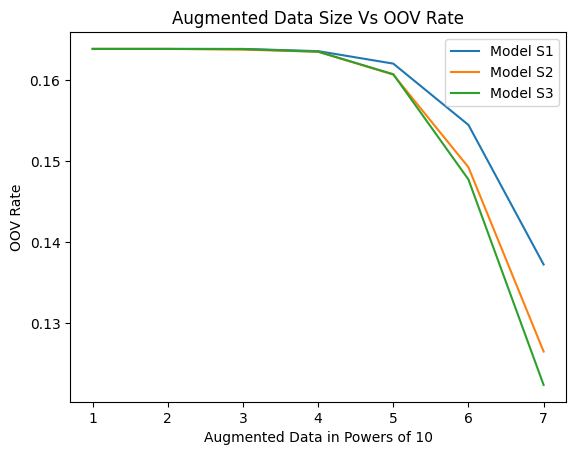

In [33]:
from matplotlib import pyplot as plt
plt.plot(list(range(1,8)),oov_s1, label='Model S1')
plt.plot(list(range(1,8)), oov_s2, label='Model S2')
plt.plot(list(range(1,8)), oov_s3, label='Model S3')

plt.title('Augmented Data Size Vs OOV Rate')
plt.xlabel('Augmented Data in Powers of 10')
plt.ylabel('OOV Rate')
plt.legend()
plt.show()

# Analysis (English and Bengali)
# 1) Data Preparation: - 
## English: - All newline characters are replaced by a space. We use regular expression to preprocess the data i.e. anything that is not in the domain [a-z0-9.!] is removed.
## Bengali: - in Bengali, we are strictly specifying to remove anything that comes in the window           [a-zA-Z0-9()🇧//:<>""-`=\|’🇩“~”_] because of the change in literature.
## Now that we have a preprocessed data for both the languages, we are randomly splitting them into 80% train set and 20% test set. They are eng_train.txt, eng_test.txt, beng_train.txt and beng_test.txt

# 2) Sub word Segmentation: - 
## Here, for the purpose of sub word segmentation, we have trained 3 models for each language which have their corresponding output files listed with the respective sub-words generated. 
## Characters Level: - S1
## English: - eng_model_s1.model is a model trained with vocab size of  62 i.e. character level segmentation. eng_s1.txt is the file of train set and eng_test_s1.txt is the file of test that is generated after character level segmentation. 
## Bengali: - Similarly, we have beng_model_s1.model trained with vocab size of 93, beng_s1.txt and beng_test_s1.txt respectively w.r.t character level segmentation.

## Sub word Units: smaller vocabulary, closer to characters: - S2
## English: - we have eng_model_s2.model trained with vocab size of 500 having eng_s2.txt and eng_test_s2.txt as the generated segmented content for train and test corpus.
## Bengali: -  similarly, we have beng_model_s2.model trained with the vocab size of 700 and its corresponding train and test corpus segmented content.

## Sub word Units: larger vocabulary, closer to words: - S3
## As before, we have eng_model_s3.model and beng_model_s3.model models trained with vocab size of 2000 and 2500. 

## As we take a look at these files, we infer that the word segmentation comparatively has a huger vocabulary size and when compared b/w the 2 languages, it is more with respect to Bengali. This could also be observed in the values given to “vocab_size” flag in both of these languages. Bengali’s value was always greater than English for all the 3 models as it is found to be morphologically rich and also contains more letters in its alphabet. 

# 3) LM Training: - 
## We used Hidden Size as 40, BPTT as 3 for all the Baseline Models for both the languages.

# Final Model Parameters: - 
## As we tried plugging in different values of hyper parameters, we arrived at better models with following values.

## English, S1: - hidden layers 160 bptt 7 and class 268. 
## S2: - hidden layers 85 bptt 3 and class 268.
## S3: -  hidden layers 60 bptt 5 and class 268.

## Bengali, S1: - hidden layers 80 bptt 5 and class 268. 
## S2: -  hidden 90, bptt 5 and class 875. 
## S3: - hidden 120, bptt 6 and class 2670.

|       | English     |          | Bengali     |          |
| ----- | ----------- | -------- | ----------- | -------- |
| Model | Baseline PP | Final PP | Baseline PP | Final PP |
| S1    | 5.27        | 4.19     | 16.3        | 13.11    |
| S2    | 34.36       | 32.74    | 91.85       | 76.96    |
| S3    | 152.00      | 148.65   | 274.27      | 256.90   |


# 4) Text Generation: 
## The artificially generated data for both languages is stored under the directories eng_s1(and s2 and s3) and beng_s1(and s2 and s3) respectively. 
## For every model S1, S2 and S3, we inspect the quality of the data and found following inferences: -
## Character segmentation can model any compositions of characters and enable better modelling of rare morphological variants. However, the improvements may not be much significant due to missing important information since the character level is more fine-grained. Hence, the generated data using model S1 is comparatively poor in quality.
## Sub word Units closer to characters and words provide more meaningful representation. For example, consider the word “looked” split into “look” and “ed”. In other words, two vectors are used to represent “looked”. Therefore, even if this word is an unknown word, still the model can translate the word accurately by treating it as a sequence of sub word units. Hence, improving the quality. In case of Bengali, as we do not know the language, we expect sub word granularity (closer to words) should work better than the other two as it is morphologically rich. 
## Therefore, for English, quality of S2 > S3 > S1 and for Bengali, S3 > S2 > S1.

# 5) OOV comparison: 
## We initially check the oov rate with respect to the original corpus and it was found to be 6.1% for English and 16.3% for Bengali. Later, we add the generated data to the original corpus by gradually increasing the vocab size in powers of 10. We see decrease in the oov rate in both languages as and when the vocab size increases. This is a known fact but the question is, which model of the three i.e. S1, S2 and S3 has lesser oov rate? 
## From our observation, S2 for English has oov rate 3.9% at 10000000 which is lesser than the other 2 models i.e. S2 < S3 < S1
## For Bengali, S3 has lesser oov rate of 12.14% compared to S2 and S1, i.e. S3 < S2 < S1.
## Hence, from the above observations, we use S2 (sub word granularity closer to character) model for English and S3(sub word granularity closer to words) for Bengali.

# Summary:  
## To summarize, this activity provides a good intuition on the importance of OOV rate in a language model and the ways in which it could be tackled. It also introduces us to the BPE algorithm and segmentation granularities, which are often used to overcome this issue. To conclude regarding the results, it was as expected that the Bengali language model is poorer compared to English but surprisingly led us in finding better results than the baseline model for Bengali. The hyper parameters that have an impact on the OOV rates are the hidden layers and bptt. An adequate amount of vocab size also matters. With these in right values, we can optimize oov rate to fetch a better model.
